In [1]:
# SHAP + I/O
import shap
import pickle
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
with open('../models/random_forest_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [8]:
import joblib

# Load test data
X_test, y_test = joblib.load('../data/test_set.joblib')

In [9]:
# Create SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values (returns list: [class_0, class_1])
shap_values = explainer.shap_values(X_test)

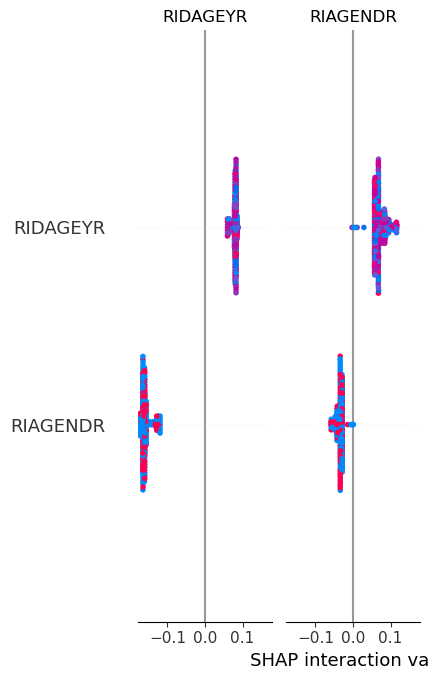

In [13]:
# This gives SHAP values + base value in one object
shap_values = explainer(X_test)

# Now plot directly
shap.summary_plot(shap_values.values, X_test)

In [14]:
print("X_test shape:", X_test.shape)

# Check if X_test is a DataFrame
print("Is X_test a DataFrame?", isinstance(X_test, pd.DataFrame))

# Check SHAP value shape
print("SHAP values shape (class 1):", shap_values[1].shape)

X_test shape: (338, 12)
Is X_test a DataFrame? True
SHAP values shape (class 1): (12, 2)


In [15]:
shap.initjs()

In [18]:
import shap

# Pick one sample index to explain
sample_idx = 0

# Get the Explanation object for the chosen sample and class 1 (CKD)
explanation = shap_values[sample_idx, :, 1]  # 1 = CKD class

# Show force plot using modern API
shap.plots.force(explanation)

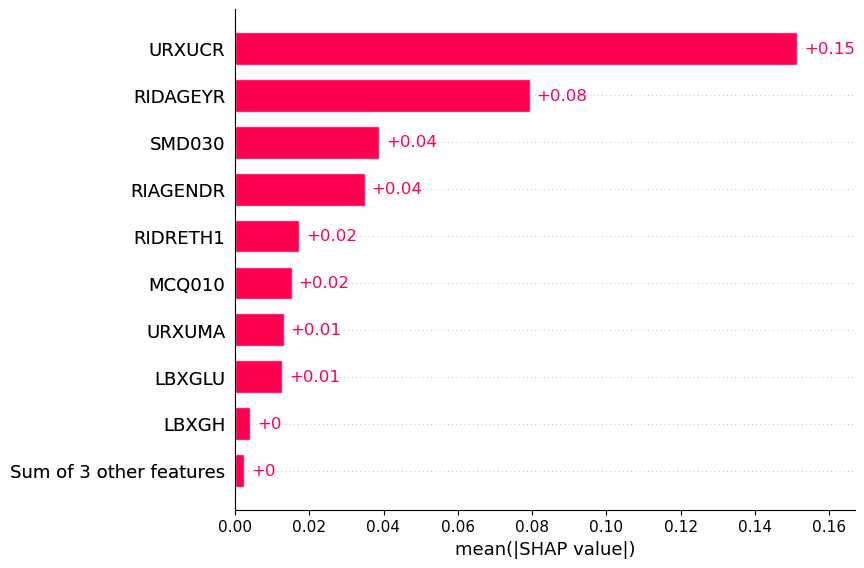

In [20]:
shap.plots.bar(shap_values[:, :, 1])

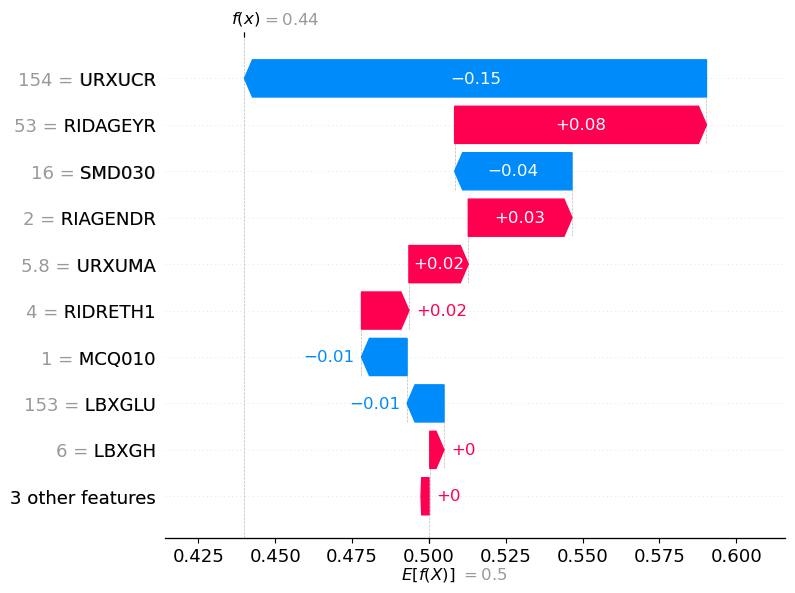

In [19]:
shap.plots.waterfall(shap_values[sample_idx, :, 1])

In [22]:
X_test.columns.tolist()

['RIAGENDR',
 'RIDAGEYR',
 'RIDRETH1',
 'LBXGH',
 'URXUMA',
 'URXUCR',
 'MCQ010',
 'SMQ020',
 'SMD030',
 'PAQ605',
 'PAQ620',
 'LBXGLU']

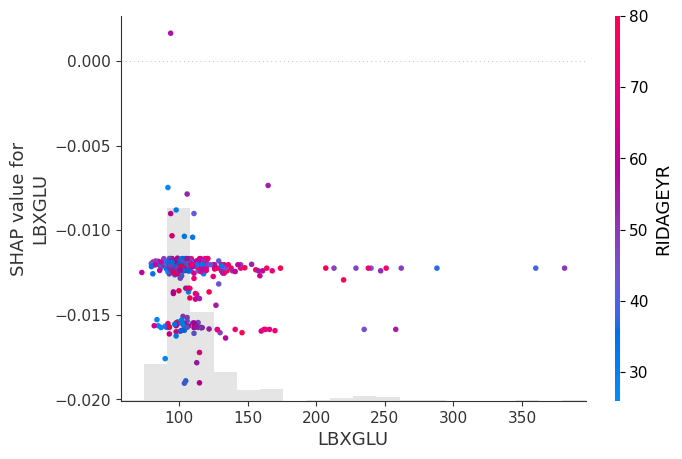

In [23]:
# Show how glucose impacts prediction, colored by age
shap.plots.scatter(shap_values[:, "LBXGLU", 1], color=shap_values[:, "RIDAGEYR", 1])

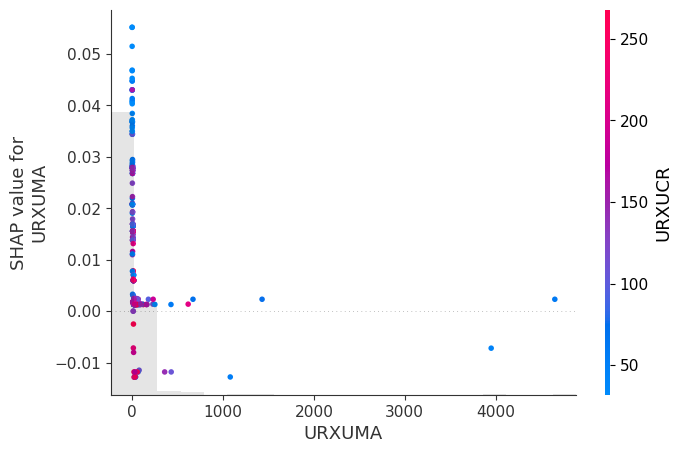

In [24]:
shap.plots.scatter(
    shap_values[:, "URXUMA", 1], 
    color=shap_values[:, "URXUCR", 1]
)

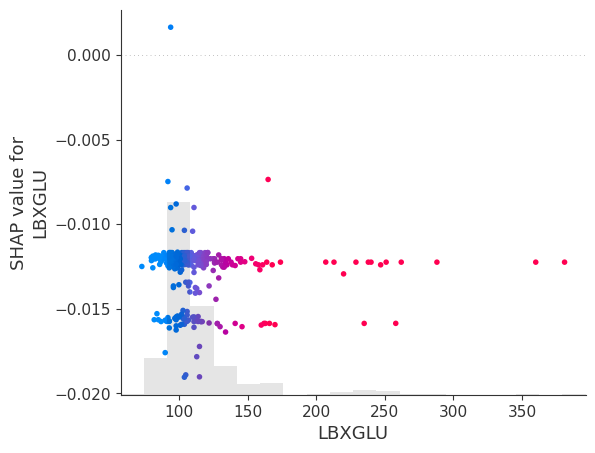

In [25]:
shap.plots.scatter(
    shap_values[:, "LBXGLU", 1], 
    color=shap_values[:, "SMQ020", 1]
)

In [28]:
print(type(shap_values[1]))
print(np.array(shap_values[1]).shape)

<class 'shap._explanation.Explanation'>


NameError: name 'np' is not defined

TypeError: 'numpy.float64' object is not iterable

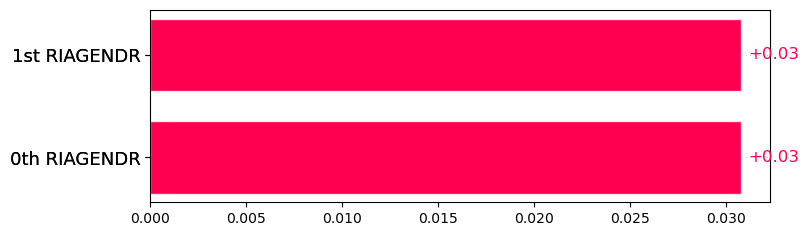

In [34]:
# Global SHAP bar plot using correct method for class 1
shap.plots.bar(shap_values[1], max_display=12)

In [35]:
import shap
import numpy as np

# Convert SHAP values for class 1 to numpy
shap_vals_class1 = shap_values[1].values  # Shape: (n_samples, n_features)
X_test_array = X_test.values

# Confirm shape alignment
print("SHAP values shape:", shap_vals_class1.shape)
print("X_test shape:", X_test_array.shape)

# Plot bar summary
shap.summary_plot(shap_vals_class1, X_test_array, feature_names=X_test.columns, plot_type="bar")

SHAP values shape: (12, 2)
X_test shape: (338, 12)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [37]:
from sklearn.model_selection import train_test_split

# Recreate feature and target sets (update 'df_final' and 'target_column' to your actual variable names)
X = df_final.drop('CKD_status', axis=1)
y = df_final['CKD_status']

# Redo the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

NameError: name 'df_final' is not defined

In [36]:
import shap
import matplotlib.pyplot as plt

# Step 1: Create SHAP explainer
explainer = shap.Explainer(rf_model, X_train)

# Step 2: Get SHAP values on X_test
shap_values = explainer(X_test)

# Check the shape (should be (338, 12))
print("SHAP values shape:", shap_values.values.shape)
print("X_test shape:", X_test.shape)

# Step 3: Bar plot for class 1 (CKD)
shap.plots.bar(shap_values[:, 1], max_display=12)  # Index 1 corresponds to CKD class

NameError: name 'X_train' is not defined

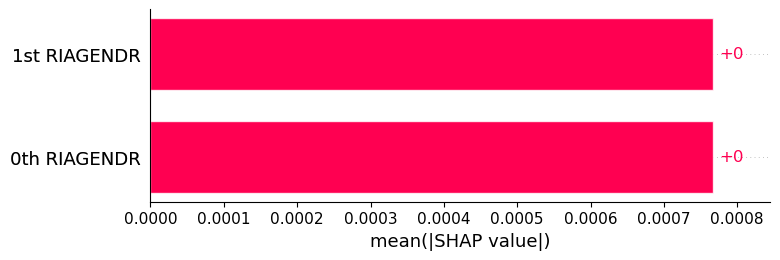

In [48]:
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Define feature matrix and target vector
X = df_final.drop(['CKD', 'SEQN'], axis=1)  # Drop ID and target
y = df_final['CKD']

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Load or use trained Random Forest model (already trained earlier)
# Make sure `rf_model` is loaded or available in memory. Example:
# from joblib import load
# rf_model = load('../models/random_forest_model.pkl')

# Step 4: Create SHAP explainer
explainer = shap.Explainer(rf_model, X_train)

# Step 5: Get SHAP values for test set
shap_values = explainer(X_test)

# Step 6: Plot SHAP summary bar plot (global importance for class 1 - CKD)

# Rebuild Explanation object explicitly for class 1 (CKD)
shap_values_class1 = shap.Explanation(
    values=shap_values[1].values,
    base_values=shap_values[1].base_values,
    data=X_test,
    feature_names=X_test.columns
)

# Now plot
shap.plots.bar(shap_values_class1, max_display=12)

In [41]:
import os
os.getcwd()

'C:\\Users\\DELL\\CKD_AI_App\\notebooks'

In [43]:
df_final.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'LBXGH', 'URXUMA', 'URXUCR',
       'MCQ010', 'SMQ020', 'SMD030', 'PAQ605', 'PAQ620', 'LBXGLU', 'CKD'],
      dtype='object')

In [44]:
df_final.head()

SEQN  RIAGENDR  RIDAGEYR  RIDRETH1  LBXGH  URXUMA  URXUCR  MCQ010  \
0  109271.0       1.0      49.0       3.0    5.6     2.4    32.0     1.0   
1  109282.0       1.0      76.0       3.0    5.5    16.0   192.0     2.0   
2  109307.0       1.0      47.0       5.0    5.3     5.8   116.0     2.0   
3  109317.0       2.0      28.0       4.0    5.0    19.0   253.0     2.0   
4  109323.0       1.0      22.0       1.0    5.2    26.7   271.0     2.0   

   SMQ020  SMD030  PAQ605  PAQ620  LBXGLU  CKD  
0     1.0    18.0     2.0     1.0   103.0    1  
1     1.0    18.0     2.0     2.0    95.0    0  
2     1.0    22.0     2.0     2.0   103.0    0  
3     1.0    27.0     2.0     2.0    88.0    0  
4     1.0    18.0     1.0     1.0   104.0    0

In [49]:
import joblib
joblib.dump(explainer, '../models/shap_explainer_rf.joblib')

['../models/shap_explainer_rf.joblib']

In [55]:
import joblib

# Load the trained Random Forest model (from Step 2)
rf_smote_model = joblib.load('../models/random_forest_model.pkl')

In [56]:
import shap
import matplotlib.pyplot as plt
import os

# Create explainer (for RandomForestClassifier trained on SMOTE data)
explainer = shap.Explainer(rf_smote_model, X_train)

# Get SHAP values (Explanation object with shape: [n_samples, n_features])
shap_values = explainer(X_test)

# Check output shape
print(f"SHAP values shape: {shap_values.shape}")  # should be (n_samples, n_features)

# Ensure output directory exists
os.makedirs('../outputs', exist_ok=True)

# Plot summary bar (global importance)
plt.switch_backend('agg')
shap.plots.bar(shap_values, max_display=12, show=False)
plt.title("Global SHAP Summary")
plt.savefig('../outputs/shap_summary_bar_plot.png', bbox_inches='tight')
plt.close()

SHAP values shape: (338, 12, 2)


IndexError: list index out of range

In [54]:
explainer = shap.Explainer(rf_smote_model, X_train)

In [60]:
import seaborn as sns
# Extract SHAP values for class 1 (CKD = Yes)
shap_class1 = shap_values.values[:, :, 1]  # Shape: (n_samples, n_features)

# Now it's safe to convert to DataFrame
shap_df = pd.DataFrame(shap_class1, columns=X_test.columns)

# Calculate mean absolute SHAP values
mean_shap = shap_df.abs().mean().sort_values(ascending=False)[:12]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap.values, y=mean_shap.index, palette="viridis")
plt.title("Top 12 Features - Mean Absolute SHAP Values (CKD Prediction)")
plt.xlabel("Mean |SHAP Value|")
plt.tight_layout()
plt.savefig("../outputs/shap_summary_bar_plot.png", bbox_inches='tight')
plt.show()